In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import datasets

In [168]:
## PART A
data=pd.read_csv('data.csv')
data.set_index('Happiness Rank', inplace=True)
data.head()

,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Happiness Rank,,,,,,,,,,,
1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 1 to 155
Data columns (total 11 columns):
Country             153 non-null object
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), object(2)
memory usage: 14.3+ KB


In [170]:
#Drop contries with NA values
data.dropna(inplace=True)
#data.drop(filter, axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 155
Data columns (total 11 columns):
Country             151 non-null object
Happiness Score     151 non-null float64
Economy             151 non-null float64
Family              151 non-null float64
Health              151 non-null float64
Freedom             151 non-null float64
Generosity          151 non-null float64
Corruption          151 non-null float64
Dystopia            151 non-null float64
Job Satisfaction    151 non-null float64
Region              151 non-null object
dtypes: float64(9), object(2)
memory usage: 14.2+ KB


In [171]:
data.describe()

,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [172]:
data.head(10)

,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Happiness Rank,,,,,,,,,,,
1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
6,Netherlands,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
7,Canada,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
8,New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
9,Sweden,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


In [173]:
data.tail(10)

,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Happiness Rank,,,,,,,,,,,
145,Haiti,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America
146,Yemen,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
148,Liberia,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
149,Guinea,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
150,Togo,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
151,Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
152,Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
153,Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
154,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa


In [174]:
## PART B
#data['Happiness Score','Region']
#d = {'Hapiness Score': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=data)
df.head()
#data.groupby('Region').Economy.mean()

,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Happiness Rank,,,,,,,,,,,
1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe


In [175]:
df = df.rename(index=str, columns={"Happiness Score": "Happiness_Score", "Job Satisfaction": "Job_Satisfaction"})

In [176]:
df.groupby('Region').Happiness_Score.mean()

Region
Africa            4.254581
Asia-Pacific      5.358326
Eastern Europe    5.498952
Europe            4.096000
Latin America     5.957818
North America     7.154500
Western Europe    6.880474
Name: Happiness_Score, dtype: float64

In [177]:
df.groupby('Region').Happiness_Score.mean()

Region
Africa            4.254581
Asia-Pacific      5.358326
Eastern Europe    5.498952
Europe            4.096000
Latin America     5.957818
North America     7.154500
Western Europe    6.880474
Name: Happiness_Score, dtype: float64

In [178]:
filter = df['Happiness_Score'] > 6
df_6 = df[filter]

In [179]:
df_6.groupby('Region').Happiness_Score.count()

Region
Asia-Pacific      11
Eastern Europe     1
Latin America     13
North America      2
Western Europe    17
Name: Happiness_Score, dtype: int64

In [180]:
max_HS = df.groupby('Region').Happiness_Score.max()

In [181]:
min_HS = df.groupby('Region').Happiness_Score.min()

In [182]:
delta_HS = max_HS - min_HS

In [183]:
delta_HS

Region
Africa            3.179
Asia-Pacific      3.852
Eastern Europe    1.454
Europe            0.000
Latin America     3.476
North America     0.323
Western Europe    2.342
Name: Happiness_Score, dtype: float64

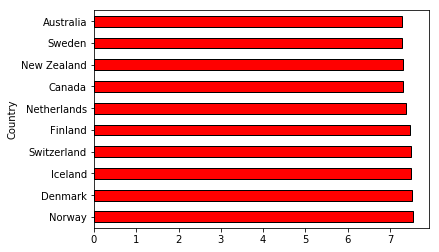

In [184]:
## PART C
import matplotlib.pyplot as plt
%matplotlib inline

data.set_index('Country', inplace=True)
values = data[0:10]['Happiness Score']
bar_plot=values.plot.barh(color = 'red', edgecolor = 'black')

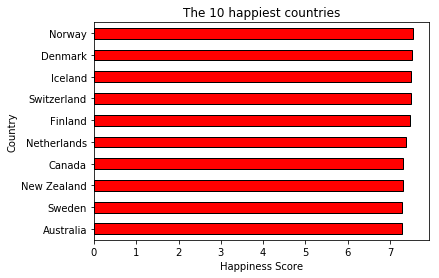

In [185]:
bar_plot=values.plot.barh(color = 'red', edgecolor = 'black')
bar_plot.set_title('The 10 happiest countries')
bar_plot.set_xlabel('Happiness Score')
bar_plot.invert_yaxis()

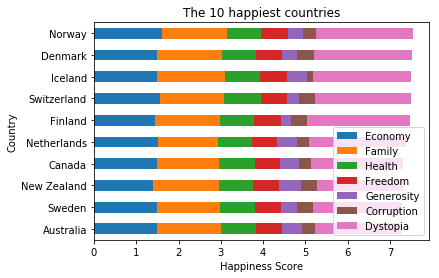

In [186]:
#[data[0:10]["Economy"], data[0:10]["Family"], data[0:10]["Health"], data[0:10]["Freedom"], data[0:10]["Generosity"], data[0:10]["Corruption"], data[0:10]["Dystopia"]]
#plt.legend(["Economy","Family","Health","Freedom","Generosity","Corruption","Dystopia"], loc='upper right')
df = pd.DataFrame(data=data[0:10], columns=['Economy', 'Family', 'Health', 'Freedom','Generosity','Corruption','Dystopia'])
plot = df.plot.barh(stacked=True);
plt.legend(loc='lower right')
plt.xlabel('Happiness Score')
plt.title('The 10 happiest countries')
plot.invert_yaxis()
plt.show()

In [187]:
filter = [ True if x=='Africa' else False for x in data['Region'] ]
Africa_data=data[filter]

In [188]:
Africa_data.head(10)

,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,
Algeria,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,68.6,Africa
Mauritius,5.629,1.189396,1.209561,0.638007,0.491247,0.360934,0.042182,1.697584,86.0,Africa
Libya,5.525,1.101803,1.357564,0.520169,0.465733,0.152074,0.092610,1.835011,75.8,Africa
Morocco,5.235,0.878115,0.774864,0.597711,0.408158,0.032210,0.087763,2.456189,64.8,Africa
Somalia,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485,79.9,Africa
Nigeria,5.074,0.783756,1.215770,0.056916,0.394953,0.230947,0.026122,2.365391,71.1,Africa
South Africa,4.829,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909,61.3,Africa
Tunisia,4.805,1.007266,0.868351,0.613212,0.289681,0.049693,0.086723,1.890251,68.4,Africa
Egypt,4.735,0.989702,0.997471,0.520187,0.282110,0.128631,0.114381,1.702161,75.1,Africa


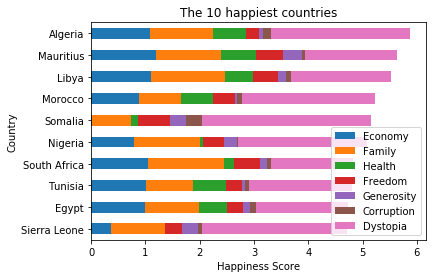

In [189]:
df = pd.DataFrame(data=Africa_data[0:10], columns=['Economy', 'Family', 'Health', 'Freedom','Generosity','Corruption','Dystopia'])
plot = df.plot.barh(stacked=True);
plt.legend(loc='lower right')
plt.xlabel('Happiness Score')
plt.title('The 10 happiest countries')
plot.invert_yaxis()
plt.show()

(array([  5.,  22.,  14.,  46.,  47.,  17.]),
 array([ 40,  50,  60,  70,  80,  90, 100]),
 <a list of 6 Patch objects>)

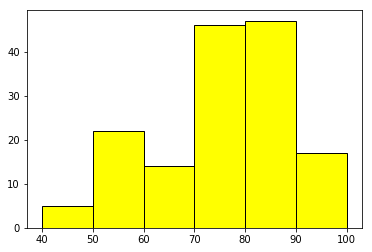

In [190]:
#Part D
data.dropna(inplace=True)
plt.hist(data["Job Satisfaction"], edgecolor='black', color='yellow', bins=[40, 50, 60, 70, 80, 90, 100])

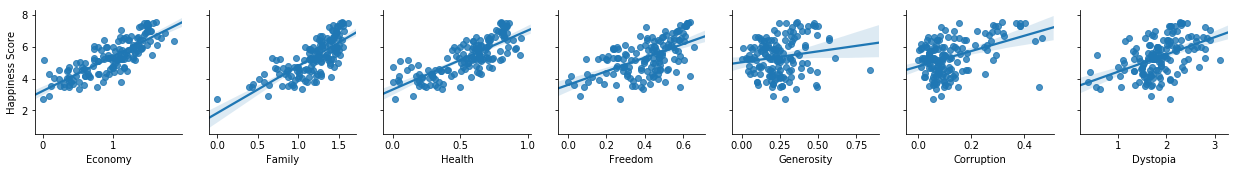

In [191]:
#Part E and F
import seaborn as sns
#sns.pairplot(data,kind='reg')
sns.pairplot(data, x_vars= ["Economy","Family","Health","Freedom","Generosity","Corruption","Dystopia"], y_vars=['Happiness Score'], kind='reg')
plt.show()

In [192]:
#Part G

# Probability is # countries Europe and score >6 / # countries >6
filter = data['Happiness Score'] > 6
b= data[filter].count()[0]
selected_data = data[filter]
filter = [ True if (x=='Western Europe' or x=='Eastern Europe') else False for x in selected_data['Region'] ]
a= selected_data[filter].count()[0]
100*a/b

40.909090909090907

In [199]:
#Part H
A = np.zeros([data.count()[0],data.groupby('Region').count().count()[1]])
data_matrix = np.array(data)
for i in range(0,data.count()[0]-1):
    if data_matrix[i,11] == 'Africa' : A[i,0] = 1;
    if data_matrix[i,11] == 'Asia-Pacific' : A[i,1] = 1;
    if data_matrix[i,11] == 'Eastern Europe' : A[i,2] = 1;
    if data_matrix[i,11] == 'Europe' : A[i,4] = 3;
    if data_matrix[i,11] == 'Latin America' : A[i,4] = 1;
    if data_matrix[i,11] == 'North America' : A[i,5] = 1;
    if data_matrix[i,11] == 'Western Europe' : A[i,6] = 1;
A.shape

(153, 7)